In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt 

In [2]:
# Ques 1 load the dataset
df=pd.read_csv('dataset.csv')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# checkout the missing value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# handle missing values if any 
df.fillna(df.mean(),inplace=True)

In [6]:
# Encode categorical variables (if any)
# df = pd.get_dummies(df, columns=['categorical_column'])

# Scale numerical features (if necessary)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['numerical_feature1', 'numerical_feature2']] = scaler.fit_transform(df[['numerical_feature1', 'numerical_feature2']])


In [7]:
# Ques 2
X=df.drop('target',axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Ques 3
rf_classifier=RandomForestClassifier(n_estimators=100 , max_depth=10)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [9]:
# Ques 4
# Evaluate the model 
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


In [10]:
# Ques 5 feature Importance 
feature_importances=rf_classifier.feature_importances_
top_features=X.columns[feature_importances.argsort()[-5:][::-1]]
print(f'Top 5 Features: {top_features}')



Top 5 Features: Index(['ca', 'thal', 'cp', 'thalach', 'oldpeak'], dtype='object')


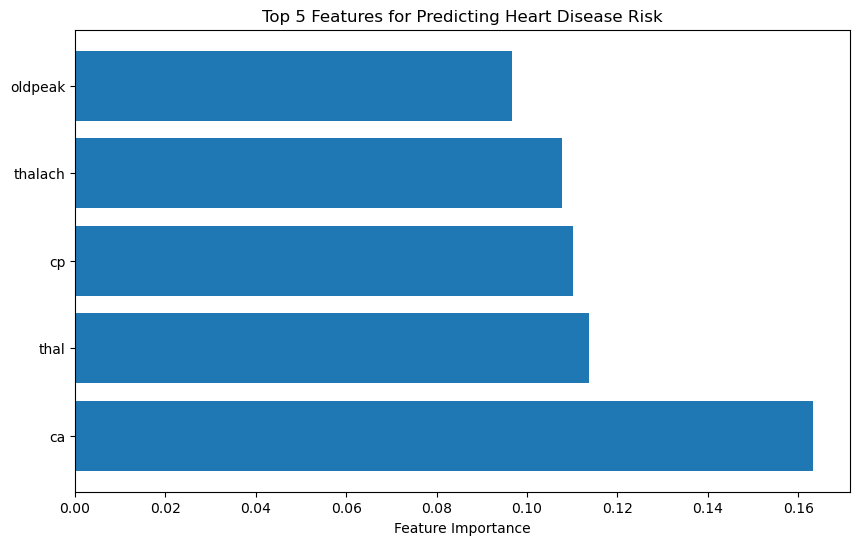

In [11]:
# Visualize Feature Importances
plt.figure(figsize=(10,6))
plt.barh(top_features, feature_importances[feature_importances.argsort()[-5:][::-1]])
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Predicting Heart Disease Risk')
plt.show()


In [12]:
# Q6: Hyperparameter Tuning (Grid Search Example)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [13]:
# # Q7: Report Best Hyperparameters and Evaluate
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
best_y_pred = best_rf_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Precision: {best_precision}')
print(f'Best Recall: {best_recall}')
print(f'Best F1 Score: {best_f1}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.8131868131868132
Best Precision: 0.8235294117647058
Best Recall: 0.84
Best F1 Score: 0.8316831683168315


In [20]:
plt.scatter(['ca', 'thal'])



TypeError: scatter() missing 1 required positional argument: 'y'